In [15]:
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Species richness')

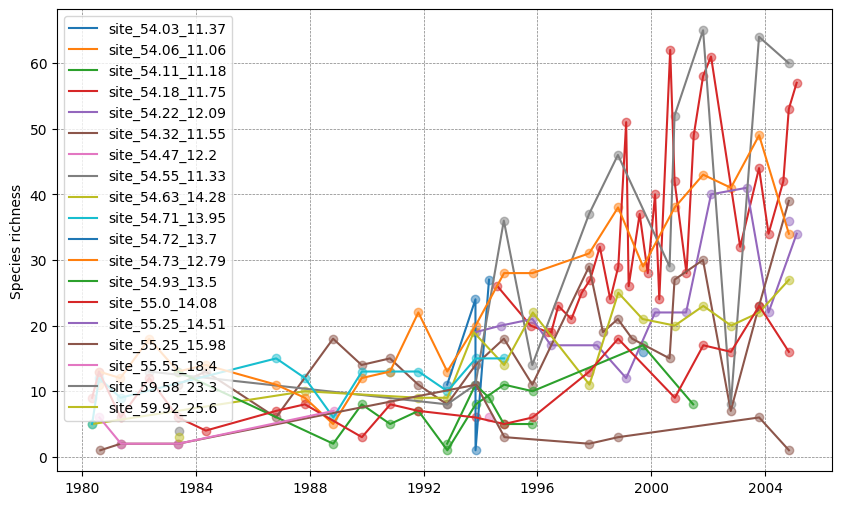

In [ ]:
data = pd.read_csv("data/sps_macrozoobenthos_timeseries.csv", header=0, index_col=0)
# Turn MMDDYYYY into a datetime object
data['date'] = pd.to_datetime(data['MMDDYYY'], format='%m-%d-%Y')


# Calculate species richness over time
species_richness = data.groupby(['site', 'date'])['scientificnameaccepted'].nunique()
species_richness = species_richness.reset_index().rename({'scientificnameaccepted': 'species_richness'}, axis=1)
species_richness

# Plot out species richness over time
plt.figure(figsize=(10, 6))
for site in species_richness['site'].unique():
    site_data = species_richness[species_richness['site'] == site]
    plt.plot(site_data['date'], site_data['species_richness'], label=site)
    plt.scatter(site_data['date'], site_data['species_richness'], alpha=0.5)
    # add background grid
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
# plt.xlabel('Year')
plt.ylabel('Species richness')

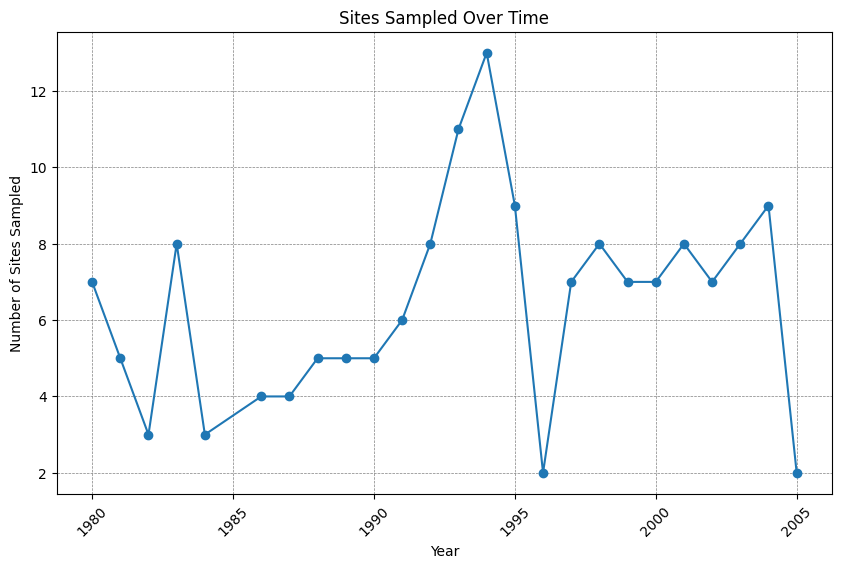

In [44]:
# Group by date and count the number of sites sampled
sites_per_date = data.groupby("date")["site"].count()

# Aggregate per year
data["year"] = data["date"].dt.year
sites_per_year  = data.groupby("year")["site"].nunique()
# Sort the index (which is now a datetime index)
sites_per_year = sites_per_year.sort_index()
sites_per_date
# # Plot the number of sites sampled over time
plt.figure(figsize=(10, 6))
plt.plot(sites_per_year.index, sites_per_year.values, marker="o", linestyle="-")

# # Formatting the plot
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.ylabel("Number of Sites Sampled")
plt.xlabel("Year")
plt.title("Sites Sampled Over Time")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

Text(0, 0.5, 'Species richness')

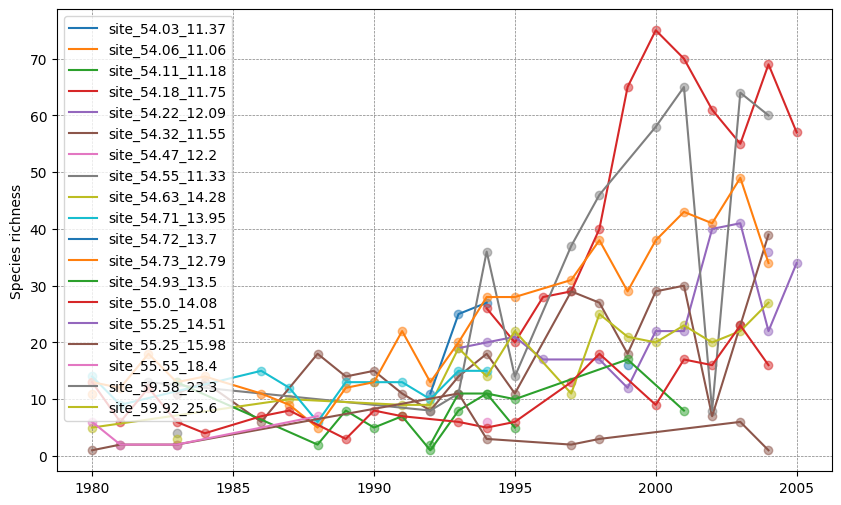

In [45]:
# Calculate species richness over year
species_richness = data.groupby(['site', 'year'])['scientificnameaccepted'].nunique()
species_richness = species_richness.reset_index().rename({'scientificnameaccepted': 'species_richness'}, axis=1)
species_richness

# Plot out species richness over time
plt.figure(figsize=(10, 6))
for site in species_richness['site'].unique():
    site_data = species_richness[species_richness['site'] == site]
    plt.plot(site_data['year'], site_data['species_richness'], label=site)
    plt.scatter(site_data['year'], site_data['species_richness'], alpha=0.5)
    # add background grid
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
# plt.xlabel('Year')
plt.ylabel('Species richness')

# Calculate richness estimators over year
chao1 and chao2

In [92]:
# chao1 species richness
def chao1(data, year):
    data_year = data[data['year'] == year]
    species_richness = data_year.groupby('site')['scientificnameaccepted'].nunique()
    singletons_count = data_year.groupby('site')['scientificnameaccepted'].value_counts().groupby('site').apply(lambda x: sum(x == 1))
    doubletons_count = data_year.groupby('site')['scientificnameaccepted'].value_counts().groupby('site').apply(lambda x: sum(x == 2))
    chao1 = species_richness + (singletons_count ** 2) / (2 * (doubletons_count + 1))
    return chao1
# chao1(data, 1991)

# 2. Write a function to calculate **Chao2**, 
# S.chao2 = function(site="", SbyS=""){
#     SbyS = as.data.frame(SbyS)
#     x = SbyS[site,]
#     SbyS.pa = (SbyS > 0) * 1 # convert SbyS matrix in to presence/absence matrix
#     Q1 = sum(colSums(SbyS.pa) == 1) # species observed once
#     Q2 = sum(colSums(SbyS.pa) == 2) # species observed twice
#     S.Chao2 = S.obs(x) + (Q1^2) / (2 * Q2)
#     return(S.Chao2)

# }
def chao2(data, year, site):
    data_filtered = data[(data['year'] == year)]
    # print(data_filtered)
    SbyS = data_filtered.groupby(['site', 'scientificnameaccepted'])['Count (Dmnless)'].sum()
    # Pivot the table
    SbyS = SbyS.unstack().fillna(0)
    if site not in SbyS.index:
        return 0
    x = SbyS.loc[site]
    SbyS_pa = (SbyS > 0) * 1
    Q1 = sum(SbyS_pa.sum() == 1)
    Q2 = sum(SbyS_pa.sum() == 2)
    S_Chao2 = len(x) + (Q1 ** 2) / (2 * Q2)
    return S_Chao2
# chao2(data, 1993, 'site_54.03_11.37')
# Create a dataframe of chao2 values for each year and site
# chao2_values = pd.DataFrame(columns=['year', 'site', 'chao2'])
# Create Chao2 values for each year and site
chao2_results = [
    {"year": y, "site": site, "chao2": chao2(data, y, site)}
    for y in data["year"].unique()
    for site in data["site"].unique()
]
chao2_values = pd.DataFrame(chao2_results)
chao2_values

,year,site,chao2
0,1993,site_54.03_11.37,71.562500
1,1993,site_54.06_11.06,0.000000
2,1993,site_54.11_11.18,71.562500
3,1993,site_54.18_11.75,0.000000
4,1993,site_54.22_12.09,71.562500
...,...,...,...
470,1981,site_55.25_14.51,0.000000
471,1981,site_55.25_15.98,29.083333
472,1981,site_55.55_18.4,29.083333
473,1981,site_59.58_23.3,0.000000


In [66]:
data

,site,MMDDYYY,scientificnameaccepted,Count (Dmnless),date,year
0,site_54.03_11.37,10-27-1993,Ampharete baltica,272,1993-10-27,1993
1,site_54.03_11.37,4-19-1994,Ampharete baltica,235,1994-04-19,1994
2,site_54.03_11.37,10-27-1993,Ampithoe rubricata,51,1993-10-27,1993
3,site_54.03_11.37,10-27-1993,Arctica islandica,5,1993-10-27,1993
4,site_54.03_11.37,4-19-1994,Aricidea cerrutii,14,1994-04-19,1994
...,...,...,...,...,...,...
3575,site_59.58_23.3,5-24-1983,Monoporeia affinis,9,1983-05-24,1983
3576,site_59.58_23.3,5-24-1983,Pontoporeia femorata,5,1983-05-24,1983
3577,site_59.92_25.6,5-24-1983,Bylgides sarsi,9,1983-05-24,1983
3578,site_59.92_25.6,5-24-1983,Gastrosaccus spinifer,47,1983-05-24,1983
